In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
# import thr Nexus file
MC_file = tables.open_file("Inputs/bb0nu_MC.h5",mode='r')
root = MC_file.root.MC
data = root
Nevents = len(data.events)

In [3]:
# Pull the extents so teh MC events can be sorted
DatL=[]
DatL.append(0)
DatP=[]
DatP.append(0)
for x in range(0,Nevents):
    DatL.append(data.extents[x]["last_hit"])
    DatP.append(data.extents[x]["last_particle"])

In [4]:
data.events.read()

array([(2500, 2.4578302), (2501, 2.4578302), (2502, 2.4578302), ...,
       (4604, 2.4578302), (4605, 2.4578302), (4606, 2.4578302)],
      dtype=[('evt_number', '<i4'), ('evt_energy', '<f4')])

In [5]:
data.events.read()[395][0]

2895

In [6]:
data.extents.read()

array([(2500, 0,    298,     7), (2501, 0,    657,    43),
       (2502, 0,   1038,    92), ..., (4604, 0, 732263, 69615),
       (4605, 0, 732575, 69621), (4606, 0, 732912, 69625)],
      dtype={'names':['evt_number','last_sns_data','last_hit','last_particle'], 'formats':['<i4','<u8','<u8','<u8'], 'offsets':[0,8,16,24], 'itemsize':32})

In [7]:
data.events

/MC/events (Table(2107,)) ''
  description := {
  "evt_number": Int32Col(shape=(), dflt=0, pos=0),
  "evt_energy": Float32Col(shape=(), dflt=0.0, pos=1)}
  byteorder := 'little'
  chunkshape := (32768,)

In [8]:
for x in range(7,43):
    print(data.particles[x])

(5, b'e-', 0, 1, [-1.7666928e+02,  1.2852294e+03, -7.1403595e+02,  6.4095417e-03], [-1.7632320e+02,  1.2844487e+03, -7.1403534e+02,  1.7048458e-02], b'ACTIVE', b'ACTIVE', [-0.09013025, -0.21544649, -0.2891678 ], 0.120886, b'eIoni')
(2, b'e-', 1, 0, [ 958.82935, -192.74683, -877.49805,    0.     ], [ 9.2859668e+02, -1.7754897e+02, -8.2751959e+02,  4.3716174e-01], b'ACTIVE', b'ACTIVE', [-1.1977118,  0.9379449, -1.0512408], 1.4074591, b'none')
(4, b'e-', 0, 2, [ 9.2727820e+02, -1.8586884e+02, -8.6446881e+02,  1.3682717e-01], [ 9.2741980e+02, -1.8571487e+02, -8.6500537e+02,  1.5274143e-01], b'ACTIVE', b'ACTIVE', [-0.00059577, -0.05852478,  0.38418657], 0.13098606, b'eIoni')
(3, b'e-', 0, 2, [ 9.4363776e+02, -1.8802748e+02, -8.7571375e+02,  6.4562224e-02], [ 9.4396814e+02, -1.8778966e+02, -8.7527875e+02,  8.2844488e-02], b'ACTIVE', b'ACTIVE', [ 0.02640795, -0.22808096,  0.32423285], 0.13627625, b'eIoni')
(1, b'e-', 1, 0, [ 958.82935, -192.74683, -877.49805,    0.     ], [ 9.5075879e+02, -1.

In [9]:
for x in range(len(data.particles)):
    if (data.particles[x][1] != b'e-') and (data.particles[x][1] != b'gamma'):
        print(data.particles[x])
    
    #data.particles[2][1] == b'e-'

In [10]:
for x in range(len(data.particles)):
    if data.particles[x][0] == 2:
        print(data.particles[x])

(2, b'e-', 1, 0, [-174.85088, 1285.5037 , -713.9089 ,    0.     ], [-1.6403845e+02,  1.2666760e+03, -6.7013519e+02,  2.9330483e-01], b'ACTIVE', b'ACTIVE', [ 0.55163276, -1.4402025 ,  0.3019409 ], 1.1415054, b'none')
(2, b'e-', 1, 0, [ 958.82935, -192.74683, -877.49805,    0.     ], [ 9.2859668e+02, -1.7754897e+02, -8.2751959e+02,  4.3716174e-01], b'ACTIVE', b'ACTIVE', [-1.1977118,  0.9379449, -1.0512408], 1.4074591, b'none')
(2, b'e-', 1, 0, [-521.1827,  897.8571, -487.2082,    0.    ], [-5.1948700e+02,  9.2222211e+02, -4.9288046e+02,  2.4119617e-01], b'ACTIVE', b'ACTIVE', [-0.7678094 ,  0.45996124,  0.71275324], 0.74209034, b'none')
(2, b'e-', 1, 0, [-516.8705 ,  833.8788 , -919.10944,    0.     ], [-4.9065161e+02,  8.2166931e+02, -9.2702020e+02,  5.2427554e-01], b'ACTIVE', b'ACTIVE', [ 1.6484967 ,  0.7542118 , -0.35909718], 1.4064076, b'none')
(2, b'e-', 1, 0, [-734.5342,  806.6708,  989.681 ,    0.    ], [-7.3509619e+02,  7.8786542e+02,  9.7986340e+02,  2.3819077e-01], b'ACTIVE', b'

(2, b'e-', 1, 0, [ 644.1184 ,  198.76872, -898.5655 ,    0.     ], [ 6.4509900e+02,  1.9720663e+02, -9.0285657e+02,  1.3843021e-01], b'ACTIVE', b'ACTIVE', [ 0.6079437 , -0.7452733 ,  0.21051717], 0.59826446, b'none')
(2, b'e-', 1, 0, [-722.36536,  722.2292 , -473.6348 ,    0.     ], [-7.3345581e+02,  7.1018243e+02, -4.7543912e+02,  2.3761788e-01], b'ACTIVE', b'ACTIVE', [-0.49256513,  0.45210144,  0.90188706], 0.72250676, b'none')
(2, b'e-', 1, 0, [ 733.8487 , -368.67462, 1166.4452 ,    0.     ], [ 7.3594965e+02, -3.7429816e+02,  1.1696281e+03,  8.8676639e-02], b'ACTIVE', b'ACTIVE', [ 0.51435405, -0.4980589 ,  0.41756186], 0.46270564, b'none')
(2, b'e-', 1, 0, [-873.94086, -209.45094, -794.9516 ,    0.     ], [-8.7466650e+02, -2.1239970e+02, -7.9354266e+02,  4.9104270e-02], b'ACTIVE', b'ACTIVE', [-0.4510025,  0.1552694, -0.2491312], 0.23109144, b'none')
(2, b'e-', 1, 0, [217.3001 , 289.07065, 258.61133,   0.     ], [222.58606  , 311.45374  , 271.5278   ,   0.3388164], b'ACTIVE', b'ACTIV

(2, b'e-', 1, 0, [200.54227  ,  92.16859  ,   4.4625344,   0.       ], [190.84834   , 107.75318   ,  10.438739  ,   0.47970107], b'ACTIVE', b'ACTIVE', [ 1.0174879e+00,  1.8440691e+00, -1.3948658e-03], 1.6562561, b'none')
(2, b'e-', 1, 0, [-563.7611 ,  -42.50169,   66.58305,    0.     ], [-5.6398383e+02, -4.2489304e+01,  6.6647713e+01,  7.3468401e-03], b'ACTIVE', b'ACTIVE', [-0.02280101,  0.12818035,  0.28073236], 0.08639596, b'none')
(2, b'e-', 1, 0, [ -98.888855, 1074.1427  ,  109.26114 ,    0.      ], [-1.09745316e+02,  1.10172034e+03,  1.04508942e+02,  3.28163683e-01], b'ACTIVE', b'ACTIVE', [-0.25060388,  0.05431179, -1.463197  ], 1.0599298, b'none')
(2, b'e-', 1, 0, [ -700.43994, -1041.3169 ,   395.22885,     0.     ], [-7.0816046e+02, -1.0451014e+03,  3.6087155e+02,  2.1382299e-01], b'ACTIVE', b'ACTIVE', [-0.637318  , -1.0340226 , -0.19827294], 0.8215959, b'none')
(2, b'e-', 1, 0, [ 333.1064, 1011.7462, -540.7646,    0.    ], [ 3.3209201e+02,  9.7955511e+02, -5.6318915e+02,  5.574

(2, b'e-', 1, 0, [-642.6385 ,  498.01907, -369.64304,    0.     ], [-6.582561e+02,  5.276662e+02, -3.757616e+02,  2.619569e-01], b'ACTIVE', b'ACTIVE', [-0.06891254,  1.455785  ,  0.3866542 ], 1.081069, b'none')
(2, b'e-', 1, 0, [-354.39178, -339.11   ,  776.4516 ,    0.     ], [-3.3189767e+02, -3.5143375e+02,  7.7411285e+02,  4.3526071e-01], b'ACTIVE', b'ACTIVE', [ 0.30693543,  0.24125324, -1.6012611 ], 1.2145646, b'none')
(2, b'e-', 1, 0, [ 374.45728 ,  -31.390247, -829.9409  ,    0.      ], [ 3.75675201e+02, -2.80395451e+01, -8.29900208e+02,  1.14539735e-01], b'ACTIVE', b'ACTIVE', [-0.19560917,  0.65914655, -0.3382079 ], 0.41000143, b'none')
(2, b'e-', 1, 0, [ 487.98825,  806.92957, -954.7428 ,    0.     ], [ 4.8980325e+02,  8.3409058e+02, -9.4178143e+02,  5.4525781e-01], b'ACTIVE', b'ACTIVE', [1.5888951 , 0.83225626, 0.85395306], 1.5402431, b'none')
(2, b'e-', 1, 0, [ 841.1541, -753.0986, -576.7481,    0.    ], [ 8.5187897e+02, -7.8010938e+02, -5.7933026e+02,  2.1713306e-01], b'ACTI

(2, b'e-', 1, 0, [-1076.7235 ,   228.4593 ,  -227.03667,     0.     ], [-1.0761436e+03,  2.3602783e+02, -2.3184979e+02,  1.8903916e-01], b'ACTIVE', b'ACTIVE', [ 0.12315798, -0.05374319,  1.0577866 ], 0.671409, b'none')
(2, b'e-', 1, 0, [ 170.79057, -307.52206, -380.57944,    0.     ], [ 201.39249  , -224.14964  , -362.94162  ,    0.6264478], b'ACTIVE', b'ACTIVE', [ 0.12816846, -1.1885984 , -2.5394852 ], 2.3419466, b'none')
(2, b'e-', 1, 0, [-362.95987, -661.1087 , 1012.4773 ,    0.     ], [-3.6304037e+02, -6.7742511e+02,  1.0321320e+03,  4.9777588e-01], b'ACTIVE', b'ACTIVE', [ 1.5534047 , -1.0014625 , -0.26970923], 1.4254556, b'none')
(2, b'e-', 1, 0, [ 1000.1367 ,  -655.49097, -1191.3633 ,     0.     ], [ 1.01273065e+03, -6.34359619e+02, -1.18808484e+03,  2.05070272e-01], b'ACTIVE', b'ACTIVE', [0.07746036, 0.78690195, 1.4851543 ], 1.2474145, b'none')
(2, b'e-', 1, 0, [ 180.89182, -118.93464, -333.49997,    0.     ], [ 227.40604  ,  -91.671295 , -347.61285  ,    0.5201465], b'ACTIVE', 

(2, b'e-', 1, 0, [ -322.27402, -1203.1678 ,  -286.59637,     0.     ], [-3.0359528e+02, -1.1933184e+03, -2.7788895e+02,  5.5366999e-01], b'ACTIVE', b'ACTIVE', [ 0.9321111,  1.7283725, -0.8791382], 1.7003596, b'none')
(2, b'e-', 1, 0, [ 785.9988 , -879.71014,  226.91217,    0.     ], [ 7.9544427e+02, -8.3330676e+02,  2.0266714e+02,  4.1733626e-01], b'ACTIVE', b'ACTIVE', [ 0.62043244,  1.8465812 , -0.24563086], 1.5178562, b'none')
(2, b'e-', 1, 0, [ 287.66992, -391.98636,  663.7892 ,    0.     ], [ 2.8338553e+02, -3.6756863e+02,  6.6256256e+02,  3.4322450e-01], b'ACTIVE', b'ACTIVE', [ 1.0538242 ,  1.2160065 , -0.22574784], 1.1923212, b'none')
(2, b'e-', 1, 0, [-88.10442  ,  -2.8558118, 355.90585  ,   0.       ], [-8.8888474e+01, -1.2356764e+00,  3.4714597e+02,  8.7290950e-02], b'ACTIVE', b'ACTIVE', [-0.27940443, -0.2985719 , -0.5439909 ], 0.3400346, b'none')
(2, b'e-', 1, 0, [144.96184, 512.71155, 262.75754,   0.     ], [1.3980225e+02, 4.7900940e+02, 2.6630362e+02, 3.3802861e-01], b'ACTI

(2, b'e-', 1, 0, [ 246.7095 , -499.3281 ,  -95.85908,    0.     ], [ 2.6422125e+02, -5.0695734e+02, -9.0940613e+01,  4.3342096e-01], b'ACTIVE', b'ACTIVE', [0.5456948, 1.8221055, 0.9433556], 1.6727802, b'none')
(2, b'e-', 1, 0, [-665.7369,  447.0246,  330.284 ,    0.    ], [-6.6731201e+02,  4.4693985e+02,  3.2965518e+02,  2.4580918e-02], b'ACTIVE', b'ACTIVE', [-0.37335408, -0.16698255, -0.26613218], 0.19555798, b'none')
(2, b'e-', 1, 0, [-290.1693 ,  852.51624,  634.20514,    0.     ], [-2.9027917e+02,  8.8511292e+02,  7.3972662e+02,  8.1436163e-01], b'ACTIVE', b'ACTIVE', [ 1.0814899, -2.213553 ,  1.4089392], 2.3726907, b'none')
(2, b'e-', 1, 0, [-411.49234, 1107.6132 ,  492.30374,    0.     ], [-4.1420178e+02,  1.0932648e+03,  4.9897385e+02,  2.6090401e-01], b'ACTIVE', b'ACTIVE', [ 1.0662732 , -0.8116523 ,  0.31523705], 0.9574058, b'none')
(2, b'e-', 1, 0, [  83.2084 , -720.8166 , -888.96924,    0.     ], [ 7.8384003e+01, -7.3777966e+02, -8.8221088e+02,  1.5847790e-01], b'ACTIVE', b'AC

(2, b'e-', 1, 0, [385.27884, 847.28326, 370.28033,   0.     ], [3.9323172e+02, 8.3164984e+02, 3.7806186e+02, 2.0528919e-01], b'ACTIVE', b'ACTIVE', [1.0895568 , 0.12386366, 0.14064316], 0.70694065, b'none')
(2, b'e-', 1, 0, [ 822.2781 ,  182.08737, -719.9659 ,    0.     ], [ 8.5086542e+02,  1.6180005e+02, -7.1691510e+02,  4.2941359e-01], b'ACTIVE', b'ACTIVE', [ 1.7494774, -1.0829328,  1.5480012], 2.1140425, b'none')
(2, b'e-', 1, 0, [ -536.64044,  -146.3799 , -1077.3044 ,     0.     ], [-5.4851263e+02, -1.6217717e+02, -1.0849854e+03,  3.6048701e-01], b'ACTIVE', b'ACTIVE', [ 0.11120413, -1.2694417 ,  0.95198226], 1.1597011, b'none')
(2, b'e-', 1, 0, [  -23.776402,   278.25812 , -1014.2051  ,     0.      ], [-5.9568210e+00,  2.7233987e+02, -1.0195505e+03,  3.6590472e-01], b'ACTIVE', b'ACTIVE', [-1.3656691,  1.2967466,  0.5554723], 1.5178611, b'none')
(2, b'e-', 1, 0, [ 402.12915, -818.7486 , -939.49457,    0.     ], [ 4.0474414e+02, -8.2186536e+02, -9.4302686e+02,  8.3081916e-02], b'ACTIV

(2, b'e-', 1, 0, [ 21.80434, 727.11194, 499.335  ,   0.     ], [3.9963554e+01, 7.1841742e+02, 4.8106738e+02, 3.5105065e-01], b'ACTIVE', b'ACTIVE', [1.2504501 , 0.6410455 , 0.30090046], 1.0141981, b'none')
(2, b'e-', 1, 0, [-436.8037 ,  590.64166, 1091.3093 ,    0.     ], [-4.3404648e+02,  5.9103101e+02,  1.0937362e+03,  4.2418376e-02], b'ACTIVE', b'ACTIVE', [ 0.4618347 ,  0.3465549 , -0.00155879], 0.26004836, b'none')
(2, b'e-', 1, 0, [ 342.8418 , -910.9392 ,  217.41919,    0.     ], [ 3.2124231e+02, -8.8550104e+02,  2.1120993e+02,  2.9996926e-01], b'ACTIVE', b'ACTIVE', [-0.55255467, -0.10667934,  1.2934207 ], 0.98925245, b'none')
(2, b'e-', 1, 0, [ 740.9875 , -419.64484,  441.59076,    0.     ], [ 7.2422229e+02, -4.1085202e+02,  4.4684256e+02,  1.6566031e-01], b'ACTIVE', b'ACTIVE', [0.47355163, 0.5301332 , 0.7568598 ], 0.6462603, b'none')
(2, b'e-', 1, 0, [  498.2971,   631.9773, -1188.8383,     0.    ], [ 5.0304266e+02,  5.8565063e+02, -1.1903429e+03,  3.6374187e-01], b'ACTIVE', b'AC

(2, b'e-', 1, 0, [  71.11736, -353.3313 , 1046.5719 ,    0.     ], [ 3.8212471e+01, -3.6952423e+02,  1.0403914e+03,  2.5624627e-01], b'ACTIVE', b'ACTIVE', [-1.2054957 , -1.4804894 , -0.02031983], 1.4655135, b'none')
(2, b'e-', 1, 0, [ 530.8355,  663.5106, -877.9135,    0.    ], [ 5.3127478e+02,  6.6394836e+02, -8.7924963e+02,  1.3672574e-02], b'ACTIVE', b'ACTIVE', [ 0.2939199 , -0.06535278, -0.3830004 ], 0.1950245, b'none')
(2, b'e-', 1, 0, [ 407.18   , -497.37436,  401.4308 ,    0.     ], [ 4.1522217e+02, -5.0772131e+02,  4.2225040e+02,  2.6202759e-01], b'ACTIVE', b'ACTIVE', [1.1581937e+00, 2.5118059e-01, 8.5416954e-04], 0.7795921, b'none')
(2, b'e-', 1, 0, [  -8.167199, -711.9249  , -338.68494 ,    0.      ], [-1.39479065e+01, -7.20900696e+02, -3.87311676e+02,  3.58820289e-01], b'ACTIVE', b'ACTIVE', [-1.5488275 , -0.08449099, -1.1064715 ], 1.4616655, b'none')
(2, b'e-', 1, 0, [-779.1614 , -932.08453, -139.57468,    0.     ], [-7.7666040e+02, -9.8059082e+02, -1.9334438e+02,  5.1616323

(2, b'e-', 1, 0, [  60.83145, -559.9587 ,  672.59143,    0.     ], [ 7.3275345e+01, -5.8793652e+02,  6.9262488e+02,  3.2294521e-01], b'ACTIVE', b'ACTIVE', [0.6608227, 0.827095 , 1.0432442], 1.0607044, b'none')
(2, b'e-', 1, 0, [ -224.07002, -1021.91   ,  1246.0977 ,     0.     ], [-2.1504907e+02, -1.0255084e+03,  1.2408643e+03,  1.2562717e-01], b'ACTIVE', b'ACTIVE', [ 0.6615827 ,  0.2587088 , -0.44162977], 0.46919426, b'none')
(2, b'e-', 1, 0, [1045.8502 , -695.167  , -444.99197,    0.     ], [ 1.0498306e+03, -6.9204529e+02, -4.4750705e+02,  4.8816871e-02], b'ACTIVE', b'ACTIVE', [ 0.0403524 ,  0.18134858, -0.56463766], 0.27287045, b'none')
(2, b'e-', 1, 0, [-693.5043 ,  674.8037 , -859.03754,    0.     ], [-6.96096497e+02,  6.67162048e+02, -8.54276978e+02,  1.22650474e-01], b'ACTIVE', b'ACTIVE', [-0.59225005, -0.55853355,  0.00833509], 0.45020303, b'none')
(2, b'e-', 1, 0, [-934.4953 , -376.90952, -363.58365,    0.     ], [-9.2789056e+02, -3.7658661e+02, -4.2314423e+02,  5.5661070e-01]

(2, b'e-', 1, 0, [-1055.4564  ,     6.483858,   859.0701  ,     0.      ], [-1.0704022e+03,  2.3551950e+01,  8.6191882e+02,  2.6932427e-01], b'ACTIVE', b'ACTIVE', [0.27166498, 1.1082258 , 0.50443864], 0.83716446, b'none')
(2, b'e-', 1, 0, [-142.07964,  493.2543 ,  280.06467,    0.     ], [-129.53404  ,  493.31348  ,  274.64047  ,    0.4972976], b'ACTIVE', b'ACTIVE', [0.6923284, 1.6523676, 0.5566216], 1.4333737, b'none')
(2, b'e-', 1, 0, [1100.6321 ,  129.5976 , -164.59879,    0.     ], [ 1.0828250e+03,  1.3700615e+02, -1.5832510e+02,  2.3513250e-01], b'ACTIVE', b'ACTIVE', [-0.5136463 ,  0.08609252, -1.1402515 ], 0.8427137, b'none')
(2, b'e-', 1, 0, [137.78108 , 437.79367 , -22.540327,   0.      ], [ 93.07626   , 383.82352   , -36.724384  ,   0.48436517], b'ACTIVE', b'ACTIVE', [-2.1950405, -0.6766388,  0.1913523], 1.8498862, b'none')
(2, b'e-', 1, 0, [ 492.5956 , -942.37177, -553.99365,    0.     ], [ 4.9061487e+02, -9.4083502e+02, -5.5666058e+02,  1.0286537e-01], b'ACTIVE', b'ACTIVE', 

(2, b'e-', 1, 0, [-1261.5275 ,    68.48136,   540.2881 ,     0.     ], [-1.2558898e+03,  5.1115688e+01,  5.4532916e+02,  4.1880310e-01], b'ACTIVE', b'ACTIVE', [-0.55568844, -1.1257299 , -1.0195787 ], 1.1850901, b'none')
(2, b'e-', 1, 0, [1071.4617,  662.9359, -609.7456,    0.    ], [ 1.0678999e+03,  6.3079413e+02, -6.1316382e+02,  2.6343307e-01], b'ACTIVE', b'ACTIVE', [0.34233907, 0.16548131, 1.6233814 ], 1.2328666, b'none')
(2, b'e-', 1, 0, [-730.02966, -510.96024, -281.59702,    0.     ], [-7.5000775e+02, -5.2863477e+02, -2.8785251e+02,  2.3561145e-01], b'ACTIVE', b'ACTIVE', [-0.18446007,  0.46955875, -1.0587142 ], 0.76826125, b'none')
(2, b'e-', 1, 0, [-264.08978,  387.85135, 1174.8325 ,    0.     ], [-2.1240547e+02,  3.4464999e+02,  1.1542002e+03,  5.0029922e-01], b'ACTIVE', b'ACTIVE', [-0.17592555, -1.4463043 , -1.0796163 ], 1.3729961, b'none')
(2, b'e-', 1, 0, [1189.2028 ,  480.09833, 1204.2141 ,    0.     ], [1.1890553e+03, 4.6822440e+02, 1.2127253e+03, 3.5122854e-01], b'ACTIVE'

(2, b'e-', 1, 0, [351.4812 ,  80.80183, 501.51102,   0.     ], [3.5595383e+02, 8.2509811e+01, 4.9607693e+02, 9.2611417e-02], b'ACTIVE', b'ACTIVE', [ 0.5129712 , -0.13607879, -0.559993  ], 0.41440317, b'none')
(2, b'e-', 1, 0, [ 461.29593, 1153.5779 ,  840.488  ,    0.     ], [4.6365442e+02, 1.0678274e+03, 8.2747461e+02, 7.4783117e-01], b'ACTIVE', b'ACTIVE', [ 0.27038422, -2.506195  ,  0.8878456 ], 2.2099407, b'none')
(2, b'e-', 1, 0, [ -771.2964 ,   955.51337, -1022.92584,     0.     ], [-7.7791766e+02,  9.4095667e+02, -1.0170800e+03,  1.9874570e-01], b'ACTIVE', b'ACTIVE', [ 1.1556703 , -0.20975865, -0.05389339], 0.7710295, b'none')
(2, b'e-', 1, 0, [  912.49786,   126.45068, -1153.7872 ,     0.     ], [ 9.4383856e+02,  9.8920914e+01, -1.1321049e+03,  5.3662670e-01], b'ACTIVE', b'ACTIVE', [ 1.9313219 , -0.13245142,  0.1946567 ], 1.500607, b'none')
(2, b'e-', 1, 0, [ 216.39162, -368.14264,  728.0283 ,    0.     ], [ 1.7665160e+02, -3.6311450e+02,  7.4514038e+02,  3.5469761e-01], b'ACTIV

(2, b'e-', 1, 0, [-949.6668 , -720.76465, -454.65784,    0.     ], [-9.2525507e+02, -7.0257159e+02, -4.7665961e+02,  3.3519116e-01], b'ACTIVE', b'ACTIVE', [ 0.6126725 ,  0.00771959, -1.4404463 ], 1.135644, b'none')
(2, b'e-', 1, 0, [  351.48907, -1061.2386 , -1248.8468 ,     0.     ], [ 3.6070944e+02, -1.1829312e+03, -1.2530302e+03,  7.3320705e-01], b'ACTIVE', b'ACTIVE', [ 1.3008909 , -0.52796364, -2.1931512 ], 2.1426957, b'none')
(2, b'e-', 1, 0, [-253.73466, 1184.8788 , -450.7365 ,    0.     ], [-2.5376875e+02,  1.1848801e+03, -4.5072672e+02,  8.3726057e-04], b'ACTIVE', b'ACTIVE', [-0.10804202,  0.04649933,  0.05267689], 0.01600205, b'none')
(2, b'e-', 1, 0, [1055.639   ,  658.98663 ,  -43.654015,    0.      ], [ 1.0560922e+03,  6.4663977e+02, -4.5616077e+01,  9.8704077e-02], b'ACTIVE', b'ACTIVE', [-0.64818597, -0.9412024 ,  0.3549978 ], 0.7902122, b'none')
(2, b'e-', 1, 0, [ 629.30963, -278.97275, -920.8151 ,    0.     ], [ 6.5053619e+02, -2.5623627e+02, -9.1397205e+02,  5.9523493e-

(2, b'e-', 1, 0, [ -509.53867,   388.97742, -1040.3402 ,     0.     ], [-5.2199463e+02,  3.6922025e+02, -1.0443748e+03,  5.5546165e-01], b'ACTIVE', b'ACTIVE', [ 0.18989113, -0.5377382 ,  1.9586854 ], 1.5920439, b'none')
(2, b'e-', 1, 0, [ 359.17606, -444.72803, 1236.8124 ,    0.     ], [ 3.9019571e+02, -4.5189792e+02,  1.1868571e+03,  6.3813734e-01], b'ACTIVE', b'ACTIVE', [ 2.068212  ,  1.1446524 , -0.11641064], 1.9102408, b'none')
(2, b'e-', 1, 0, [1134.7819 , -283.6428 , -624.84686,    0.     ], [ 1.1495217e+03, -2.8286804e+02, -6.6313922e+02,  5.1950723e-01], b'ACTIVE', b'ACTIVE', [-1.8155732 ,  0.22653957, -0.2320529 ], 1.4027917, b'none')
(2, b'e-', 1, 0, [ 422.33304,  626.5368 , -662.3271 ,    0.     ], [ 4.1343771e+02,  6.2243738e+02, -6.6231464e+02,  1.3283980e-01], b'ACTIVE', b'ACTIVE', [-0.6236015 , -0.74128294, -0.1363582 ], 0.5926734, b'none')
(2, b'e-', 1, 0, [ 154.7888 , -464.42188,  541.05194,    0.     ], [ 1.5954703e+02, -4.4508926e+02,  5.4793323e+02,  2.6143330e-01],

(2, b'e-', 1, 0, [647.99194, 401.83813, 961.60376,   0.     ], [6.4337518e+02, 4.1046277e+02, 9.9122156e+02, 2.2299618e-01], b'ACTIVE', b'ACTIVE', [-0.20783883,  0.3786841 ,  1.3868173 ], 1.0288001, b'none')
(2, b'e-', 1, 0, [ -40.782135 ,    8.4812155, -494.8003   ,    0.       ], [-4.3243225e+01,  1.2254767e+01, -4.9031964e+02,  7.7832788e-02], b'ACTIVE', b'ACTIVE', [-2.5926213,  0.6647376, -0.3522416], 2.236501, b'none')
(2, b'e-', 1, 0, [-1052.4648 ,   248.80243, -1162.0928 ,     0.     ], [-1.0638518e+03,  2.8328278e+02, -1.1654460e+03,  2.1661745e-01], b'ACTIVE', b'ACTIVE', [-0.96972007,  0.51242095, -0.40258816], 0.76419884, b'none')
(2, b'e-', 1, 0, [-551.5049,  485.8976, -516.0036,    0.    ], [-5.6106281e+02,  4.6738699e+02, -5.2409412e+02,  4.3284446e-01], b'ACTIVE', b'ACTIVE', [-1.6488974 , -0.57697   , -0.31916425], 1.3369033, b'none')
(2, b'e-', 1, 0, [-1009.74036,   741.13666,  1012.2895 ,     0.     ], [-1.00222046e+03,  7.23612549e+02,  1.01734271e+03,  1.64670184e-01]

(2, b'e-', 1, 0, [-449.18765 ,  -25.824305,  320.59528 ,    0.      ], [-4.6126102e+02, -1.5858877e+01,  3.4255603e+02,  4.1349307e-01], b'ACTIVE', b'ACTIVE', [ 0.16571382, -0.66914636,  1.3596463 ], 1.0967871, b'none')
(2, b'e-', 1, 0, [642.5097  ,   5.620651, 452.13638 ,   0.      ], [ 6.7719702e+02, -1.1151749e+00,  4.4697113e+02,  4.7735360e-01], b'ACTIVE', b'ACTIVE', [-1.1475899 , -1.9300803 , -0.22375052], 1.8027333, b'none')
(2, b'e-', 1, 0, [-467.8288 , -231.91273,  623.57605,    0.     ], [-4.8001416e+02, -2.5558119e+02,  6.1474176e+02,  3.1172344e-01], b'ACTIVE', b'ACTIVE', [-0.7035632,  1.5421224, -0.8656582], 1.459693, b'none')
(2, b'e-', 1, 0, [591.3478 , 254.85486, 731.2364 ,   0.     ], [5.7795007e+02, 2.7255273e+02, 7.1462543e+02, 2.5805363e-01], b'ACTIVE', b'ACTIVE', [-0.32071245,  1.0212562 ,  0.8568612 ], 0.95226854, b'none')
(2, b'e-', 1, 0, [  29.058828, -387.9311  , 1052.3617  ,    0.      ], [ 4.7935982e+01, -3.6174524e+02,  1.0578519e+03,  3.4940130e-01], b'ACTI

(2, b'e-', 1, 0, [ -226.13919,   339.40314, -1138.7119 ,     0.     ], [-2.9800958e+02,  3.7416278e+02, -1.1129493e+03,  7.4631345e-01], b'ACTIVE', b'ACTIVE', [-1.0669324,  1.2510386,  1.9593786], 2.0973966, b'none')
(2, b'e-', 1, 0, [ 731.0504 , -312.52963, -879.9262 ,    0.     ], [ 7.659587e+02, -2.515288e+02, -9.122449e+02,  6.704324e-01], b'ACTIVE', b'ACTIVE', [1.6612219, 0.1638967, 2.0016549], 2.1449873, b'none')
(2, b'e-', 1, 0, [ 635.4978 , -226.83386, -170.39624,    0.     ], [ 6.5203094e+02, -2.2914058e+02, -1.3424522e+02,  4.3459654e-01], b'ACTIVE', b'ACTIVE', [ 1.3331412, -0.4612577,  1.0705462], 1.332154, b'none')
(2, b'e-', 1, 0, [-701.15936,  830.3759 ,  993.3311 ,    0.     ], [-7.1450189e+02,  8.0274139e+02,  9.7587701e+02,  5.2434224e-01], b'ACTIVE', b'ACTIVE', [ 1.5990804 ,  0.706378  , -0.59658736], 1.4055251, b'none')
(2, b'e-', 1, 0, [ 408.5814, 1130.1984,  617.6324,    0.    ], [4.0824539e+02, 1.1301349e+03, 6.1737543e+02, 6.9693043e-03], b'ACTIVE', b'ACTIVE', [ 

(2, b'e-', 1, 0, [  717.3767 , -1074.0012 ,   575.27594,     0.     ], [ 7.239772e+02, -1.063954e+03,  5.686630e+02,  2.521480e-01], b'ACTIVE', b'ACTIVE', [ 1.3471092 , -0.17509395, -0.19738646], 0.9537339, b'none')
(2, b'e-', 1, 0, [-892.5571 ,  814.26385, -423.13928,    0.     ], [-8.9189252e+02,  8.1494086e+02, -4.2179352e+02,  2.6664779e-02], b'ACTIVE', b'ACTIVE', [-0.10754757,  0.39497286,  0.21702729], 0.17877698, b'none')
(2, b'e-', 1, 0, [-110.29124, -705.88245,  756.20105,    0.     ], [-1.01670204e+02, -6.81989319e+02,  7.62919983e+02,  1.80720463e-01], b'ACTIVE', b'ACTIVE', [-0.7395708 ,  0.72274375,  1.3077316 ], 1.2327342, b'none')
(2, b'e-', 1, 0, [ 987.6446 , -574.02856,  739.72125,    0.     ], [ 9.4371649e+02, -5.8601416e+02,  6.9871063e+02,  4.0935764e-01], b'ACTIVE', b'ACTIVE', [ 0.00352033, -0.6647009 , -1.727856  ], 1.4095339, b'none')
(2, b'e-', 1, 0, [ -357.37582,   461.67462, -1149.7863 ,     0.     ], [-3.6611984e+02,  4.5487781e+02, -1.1857649e+03,  6.7207271e

(2, b'e-', 1, 0, [ 801.17816,  106.89218, 1048.2494 ,    0.     ], [8.7836768e+02, 9.6645920e+01, 1.0742999e+03, 7.5814211e-01], b'ACTIVE', b'ACTIVE', [0.24922563, 1.0671973 , 2.3876076 ], 2.1653442, b'none')
(2, b'e-', 1, 0, [1249.777 , -271.6146, -738.9962,    0.    ], [ 1.2622195e+03, -2.9389319e+02, -7.0237311e+02,  5.0070620e-01], b'ACTIVE', b'ACTIVE', [0.16942036, 1.5378186 , 0.8543338 ], 1.3287281, b'none')
(2, b'e-', 1, 0, [-299.86792,  799.8192 , 1031.3328 ,    0.     ], [-2.9896161e+02,  7.8275873e+02,  1.0268209e+03,  2.2232176e-01], b'ACTIVE', b'ACTIVE', [-0.53871304, -0.84365827,  0.69607234], 0.81097215, b'none')
(2, b'e-', 1, 0, [  168.67265, -1062.6418 ,   712.8688 ,     0.     ], [ 1.6214189e+02, -1.0497546e+03,  7.4449133e+02,  4.2640659e-01], b'ACTIVE', b'ACTIVE', [-0.897613 ,  0.6863722,  1.5314895], 1.4596344, b'none')
(2, b'e-', 1, 0, [596.12854, 315.53314, 162.49158,   0.     ], [553.72656   , 320.5465    , 168.04434   ,   0.71206564], b'ACTIVE', b'ACTIVE', [-0.8

(2, b'e-', 1, 0, [171.41473, 809.4003 , 890.8724 ,   0.     ], [1.7736653e+02, 8.0763965e+02, 8.9240723e+02, 8.0854647e-02], b'ACTIVE', b'ACTIVE', [0.44351092, 0.2940148 , 0.39388025], 0.32530737, b'none')
(2, b'e-', 1, 0, [936.1308 , -86.67966, 613.75525,   0.     ], [ 9.4008563e+02, -8.5669388e+01,  6.1207910e+02,  5.3483836e-02], b'ACTIVE', b'ACTIVE', [-0.02382889,  0.5791044 , -0.03894373], 0.2626717, b'none')
(2, b'e-', 1, 0, [  889.06537,   100.10755, -1067.7634 ,     0.     ], [ 8.8123022e+02,  9.1924721e+01, -1.0464524e+03,  3.9628482e-01], b'ACTIVE', b'ACTIVE', [-0.4551408 ,  0.80498695,  1.6263206 ], 1.4283813, b'none')
(2, b'e-', 1, 0, [ -45.39711,  986.54114, 1231.205  ,    0.     ], [-4.9011120e+01,  1.0076565e+03,  1.1899630e+03,  3.9949673e-01], b'ACTIVE', b'ACTIVE', [ 0.8565759,  0.4795009, -1.3109205], 1.2045989, b'none')
(2, b'e-', 1, 0, [-933.34827,  421.26447, -764.84937,    0.     ], [-9.3092133e+02,  4.1793567e+02, -7.6635211e+02,  1.3363302e-01], b'ACTIVE', b'ACT

(2, b'e-', 1, 0, [1128.7666 ,  374.72226, -129.65988,    0.     ], [ 1.1193745e+03,  3.3853726e+02, -9.3051361e+01,  4.7207665e-01], b'ACTIVE', b'ACTIVE', [ 0.29266256, -1.7396134 ,  0.8689902 ], 1.5207909, b'none')
(2, b'e-', 1, 0, [  286.24518,   847.74915, -1211.4907 ,     0.     ], [ 2.9170441e+02,  8.4098651e+02, -1.2070726e+03,  1.4584050e-01], b'ACTIVE', b'ACTIVE', [ 0.3430083 , -0.80508816, -0.13954175], 0.5119446, b'none')
(2, b'e-', 1, 0, [-766.8789 ,  575.42303, -911.95526,    0.     ], [-7.8022339e+02,  5.8295197e+02, -9.0440942e+02,  2.7309158e-01], b'ACTIVE', b'ACTIVE', [ 0.6552258 , -0.16521876,  1.1142979 ], 0.88878596, b'none')
(2, b'e-', 1, 0, [ 232.88359, 1054.034  , 1127.0913 ,    0.     ], [1.7009213e+02, 1.1147203e+03, 1.1166669e+03, 5.8131427e-01], b'ACTIVE', b'ACTIVE', [-0.46719205,  2.0035732 , -1.6496859 ], 2.1751056, b'none')
(2, b'e-', 1, 0, [-296.63193,  852.3321 , -435.5072 ,    0.     ], [-2.8922647e+02,  8.8671387e+02, -4.1154175e+02,  4.5124301e-01], b'

(2, b'e-', 1, 0, [-417.8322 ,  613.5289 ,  879.21576,    0.     ], [-4.0718207e+02,  6.0766248e+02,  8.7787238e+02,  1.3883054e-01], b'ACTIVE', b'ACTIVE', [ 0.30666044, -0.11408973,  0.92227256], 0.5929774, b'none')
(2, b'e-', 1, 0, [-386.2395, -532.2229, -717.7785,    0.    ], [-3.3988577e+02, -4.9094702e+02, -7.0473981e+02,  5.4192424e-01], b'ACTIVE', b'ACTIVE', [-0.02073384, -1.7835548 , -1.0267246 ], 1.6095625, b'none')
(2, b'e-', 1, 0, [-1125.1488 ,   593.1216 ,   236.78366,     0.     ], [-1.1205807e+03,  5.9958258e+02,  2.5574219e+02,  1.8544753e-01], b'ACTIVE', b'ACTIVE', [0.6002263 , 0.57319295, 0.6779156 ], 0.6762294, b'none')
(2, b'e-', 1, 0, [1222.9863 , -199.10373, -259.5918 ,    0.     ], [ 1.1324358e+03, -2.0564279e+02, -2.6410135e+02,  6.9332451e-01], b'ACTIVE', b'ACTIVE', [-2.4697967 ,  0.3503862 , -0.33306703], 2.0570197, b'none')
(2, b'e-', 1, 0, [-210.75487, -704.68475, -939.23694,    0.     ], [-2.1276073e+02, -7.0383307e+02, -9.2807227e+02,  7.1176964e-01], b'ACTI

(2, b'e-', 1, 0, [ 444.6705, -486.1846, 1169.186 ,    0.    ], [ 4.4981897e+02, -4.5309848e+02,  1.2073248e+03,  4.2976165e-01], b'ACTIVE', b'ACTIVE', [-0.09394403,  1.8042488 ,  0.85437423], 1.5518183, b'none')
(2, b'e-', 1, 0, [ 785.977  , -599.84424,  646.7058 ,    0.     ], [ 7.8536646e+02, -6.0019708e+02,  6.4607678e+02,  2.4119107e-02], b'ACTIVE', b'ACTIVE', [-0.02876015, -0.39873764,  0.27619836], 0.19414242, b'none')
(2, b'e-', 1, 0, [-420.01517, -523.04535, 1089.7635 ,    0.     ], [-4.1967670e+02, -5.0709937e+02,  1.0814630e+03,  1.4610820e-01], b'ACTIVE', b'ACTIVE', [-0.69845706,  0.59084827, -0.32410333], 0.58586335, b'none')
(2, b'e-', 1, 0, [ 464.66803,  431.52274, 1129.4473 ,    0.     ], [4.5638193e+02, 4.1696188e+02, 1.1398279e+03, 3.6208850e-01], b'ACTIVE', b'ACTIVE', [ 0.04445511, -0.75436187,  1.2700334 ], 1.0526962, b'none')
(2, b'e-', 1, 0, [-494.00018, -684.40485,  339.62848,    0.     ], [-4.9398975e+02, -6.8469250e+02,  3.3933282e+02,  8.4619327e-03], b'ACTIVE'

(2, b'e-', 1, 0, [  450.43707,   696.01166, -1063.1649 ,     0.     ], [ 4.1018671e+02,  7.3499353e+02, -1.0783369e+03,  7.5569659e-01], b'ACTIVE', b'ACTIVE', [-2.4413111 , -0.50711256, -0.35560852], 2.05897, b'none')
(2, b'e-', 1, 0, [-215.03502, -955.264  ,  725.31506,    0.     ], [-2.0316121e+02, -8.9845148e+02,  7.3824097e+02,  7.8278899e-01], b'ACTIVE', b'ACTIVE', [-1.6454426,  2.2752235, -0.5124845], 2.388636, b'none')
(2, b'e-', 1, 0, [-927.53235,  708.3031 ,  956.0619 ,    0.     ], [-8.9757727e+02,  7.1496204e+02,  9.7219147e+02,  4.5594862e-01], b'ACTIVE', b'ACTIVE', [-0.04900632,  1.9110378 ,  0.24080792], 1.4823841, b'none')
(2, b'e-', 1, 0, [ 597.181  ,  245.2493 , -434.07745,    0.     ], [ 6.3343939e+02,  2.3448903e+02, -4.2756775e+02,  3.2497090e-01], b'ACTIVE', b'ACTIVE', [ 1.2084916 , -0.48043805, -0.6582499 ], 1.0335675, b'none')
(2, b'e-', 1, 0, [-522.8539 ,  440.69843,  980.72125,    0.     ], [-5.2515723e+02,  4.3296173e+02,  9.7635913e+02,  1.2139308e-01], b'ACT

(2, b'e-', 1, 0, [1127.6787 , -508.2281 , -582.44104,    0.     ], [ 1.1275020e+03, -5.0799969e+02, -5.8258417e+02,  1.4093479e-02], b'ACTIVE', b'ACTIVE', [0.01522076, 0.28920257, 0.16555956], 0.09924666, b'none')
(2, b'e-', 1, 0, [-348.49655,  382.76923, -596.2869 ,    0.     ], [-3.4236679e+02,  3.7893073e+02, -5.9675818e+02,  7.5847991e-02], b'ACTIVE', b'ACTIVE', [ 0.01186079, -0.11442188, -0.6857967 ], 0.35194373, b'none')
(2, b'e-', 1, 0, [  94.51538,  604.2863 , 1218.1672 ,    0.     ], [1.2393375e+02, 5.8252863e+02, 1.2065215e+03, 4.5337644e-01], b'ACTIVE', b'ACTIVE', [ 0.36454418, -2.7081683 , -0.14294003], 2.2726355, b'none')
(2, b'e-', 1, 0, [  -15.001786,  -334.84885 , -1137.8945  ,     0.      ], [-1.4952606e+01, -3.3544147e+02, -1.1444015e+03,  1.1404246e-01], b'ACTIVE', b'ACTIVE', [-0.4816168 ,  0.63398767, -0.04694068], 0.43621725, b'none')
(2, b'e-', 1, 0, [-738.48157, -225.64091, 1273.033  ,    0.     ], [-7.0227368e+02, -2.1642844e+02,  1.2701573e+03,  5.3197414e-01],

(2, b'e-', 1, 0, [ 500.24673,  764.46027, -310.72705,    0.     ], [ 5.2878339e+02,  7.3797284e+02, -3.3540149e+02,  5.6489670e-01], b'ACTIVE', b'ACTIVE', [ 0.5032021, -1.4835752,  1.2941486], 1.5842692, b'none')
(2, b'e-', 1, 0, [ 712.59375,  761.9189 , 1139.9647 ,    0.     ], [7.2973145e+02, 7.5621033e+02, 1.1080690e+03, 2.8978479e-01], b'ACTIVE', b'ACTIVE', [ 1.0699694 , -0.40370575, -0.699755  ], 0.9237797, b'none')
(2, b'e-', 1, 0, [-242.59859,  681.13763, 1006.1367 ,    0.     ], [-2.52318634e+02,  7.02868347e+02,  1.01149084e+03,  4.17174608e-01], b'ACTIVE', b'ACTIVE', [-1.7090878 , -0.27466998, -0.347294  ], 1.3269777, b'none')
(2, b'e-', 1, 0, [-511.96002, -537.6449 , -185.65384,    0.     ], [-5.2400250e+02, -5.2846680e+02, -2.1422098e+02,  2.7226540e-01], b'ACTIVE', b'ACTIVE', [-1.2467242 , -0.6140669 , -0.61228245], 1.0913148, b'none')
(2, b'e-', 1, 0, [-557.7473  ,  -56.270233,  976.54315 ,    0.      ], [-5.3404468e+02, -5.3041767e+01,  9.8595953e+02,  3.4949583e-01], b'

(2, b'e-', 1, 0, [-1190.3754 ,   283.86026,   666.6772 ,     0.     ], [-1.2007249e+03,  2.7846909e+02,  6.6402368e+02,  1.6378605e-01], b'ACTIVE', b'ACTIVE', [-0.19148584, -0.6483649 , -0.7259897 ], 0.60489744, b'none')
(2, b'e-', 1, 0, [-745.1787 , -648.04443,  643.6008 ,    0.     ], [-7.5246613e+02, -6.5936945e+02,  6.3534125e+02,  1.3876887e-01], b'ACTIVE', b'ACTIVE', [-0.36454758, -0.27930665, -0.80090755], 0.5442167, b'none')
(2, b'e-', 1, 0, [ -453.35254, -1187.9344 ,   460.04404,     0.     ], [-4.4873840e+02, -1.1830461e+03,  4.5515048e+02,  1.9522810e-01], b'ACTIVE', b'ACTIVE', [0.1097252 , 0.9538505 , 0.31106296], 0.62026167, b'none')
(2, b'e-', 1, 0, [-848.541  ,  411.7653 ,  143.17253,    0.     ], [-8.4316882e+02,  4.1276315e+02,  1.0637088e+02,  2.7583483e-01], b'ACTIVE', b'ACTIVE', [ 1.1984894 , -0.14058468, -1.3517904 ], 1.3717115, b'none')
(2, b'e-', 1, 0, [-213.61388, -840.9875 , -823.3765 ,    0.     ], [-2.5435255e+02, -8.7593341e+02, -7.7792987e+02,  4.4310421e-0

In [11]:
data.extents[5]

(2505, 0, 2131, 243)

In [12]:
data

/MC (Group) ''
  children := ['configuration' (Table), 'events' (Table), 'extents' (Table), 'hits' (Table), 'particles' (Table), 'sensor_positions' (Table), 'waveforms' (Table)]

In [13]:
# for a specific event grab the hits
EVENT=2106
EVENT=2097
EVENT=373
EVENT=395

MC_Xhit = []
MC_Yhit = []
MC_Zhit = []
MC_Ehit = []
MC_Ihit = []

for x in range(DatL[EVENT],DatL[EVENT+1]):

    MC_Xhit.append(data.hits[x]["hit_position"][0])
    MC_Yhit.append(data.hits[x]["hit_position"][1])
    MC_Zhit.append(data.hits[x]["hit_position"][2])
    MC_Ehit.append(data.hits[x]["hit_energy"])
    MC_Ihit.append(data.hits[x]["hit_time"])
MC_Xhit = np.array(MC_Xhit)
MC_Yhit = np.array(MC_Yhit)
MC_Zhit = np.array(MC_Zhit)
MC_Ehit = np.array(MC_Ehit)
MC_Ihit = np.array(MC_Ihit)

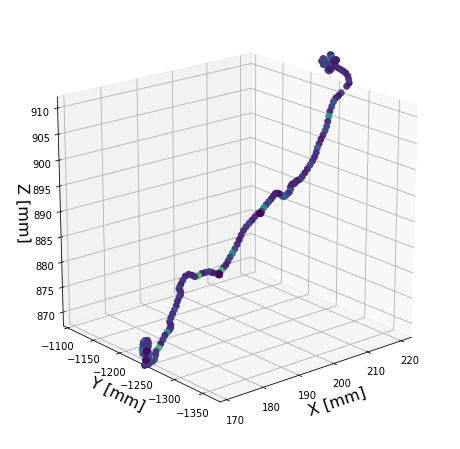

In [14]:
## Plot the MC truth
cmap = cm.viridis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(MC_Xhit, MC_Yhit, MC_Zhit, c=MC_Ehit, s=35, cmap=cmap)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)
#plt.colorbar(sc)
#ax.set_xlim(60,100)
#ax.set_ylim(1050,1100)
#ax.set_zlim(-1150,-1060)

mx = np.mean(MC_Xhit)
sx = np.std(MC_Xhit)
ax.set_xlim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Yhit)
sx = np.std(MC_Yhit)
ax.set_ylim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Zhit)
sx = np.std(MC_Zhit)
ax.set_zlim(mx-1*sx,mx+1*sx)
#ax.set_ylim(1050,1100)
#ax.set_zlim(-1150,-1060)


ax.view_init(20, 230)
#ax.view_init(30, 130)

plt.show()

In [15]:
np.std(MC_Xhit)

26.352818

In [16]:
# set some filter so it is centered at the orgin
MC_X_off = min(MC_Xhit[MC_Xhit>170])
MC_Y_off = min(MC_Yhit[MC_Yhit<-1100])         
MC_Z_off = min(MC_Zhit[MC_Zhit>800])         

MC_Xhit_new = MC_Xhit - MC_X_off
MC_Yhit_new = MC_Yhit - MC_Y_off
MC_Zhit_new = MC_Zhit - MC_Z_off

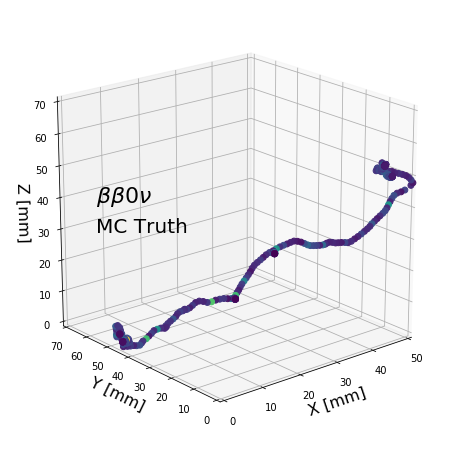

In [17]:
cmap = cm.viridis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(MC_Xhit_new, MC_Yhit_new, MC_Zhit_new, c=MC_Ehit, s=35, cmap=cmap)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)
#plt.colorbar(sc)
ax.text2D(0.2, 0.55, r"$\beta\beta0\nu$",fontsize=22, transform=ax.transAxes)
ax.text2D(0.2, 0.48, "MC Truth",fontsize=20, transform=ax.transAxes)

ax.set_xlim([0,50])
ax.set_ylim([0,70])
ax.set_zlim([0,70])
ax.view_init(20, 230)

plt.show()

In [54]:
reco_group_name = '/FANALIC/ANA_fwhm_05_voxel_3x3x3'
file_events = pd.read_hdf("Inputs/bb0nu-ANA.h5", reco_group_name + '/events')
file_voxels = pd.read_hdf("Inputs/bb0nu-ANA.h5", reco_group_name + '/voxels')
events_reco_df = pd.DataFrame()
voxels_reco_df = pd.DataFrame()
events_reco_df = pd.concat([events_reco_df, file_events], axis=0)
voxels_reco_df = pd.concat([voxels_reco_df, file_voxels], axis=0)

In [34]:
file_events.keys()

Index(['num_MCparts', 'num_MChits', 'mcE', 'smE', 'smE_filter', 'num_voxels',
       'voxel_sizeX', 'voxel_sizeY', 'voxel_sizeZ', 'voxels_minZ',
       'voxels_maxZ', 'voxels_maxRad', 'veto_energy', 'fid_filter',
       'num_tracks', 'track0_E', 'track0_voxels', 'track0_length', 'track1_E',
       'track1_voxels', 'track1_length', 'track2_E', 'track2_voxels',
       'track2_length', 'tracks_filter', 'blob1_E', 'blob2_E', 'blobs_filter',
       'roi_filter'],
      dtype='object')

In [20]:
yes_pass =  file_events['blob2_E'] > 0.4
yes_pass_id = file_events[yes_pass]
yes_pass_id = np.array(list(yes_pass_id.index)) - 2500
len(yes_pass_id)

815

In [21]:
yes_pass_id[0:20]

array([ 1,  6,  9, 10, 17, 18, 19, 24, 27, 30, 31, 32, 34, 36, 39, 40, 41,
       43, 44, 47])

In [22]:
no_pass =  file_events['blob2_E'] < 0.4
no_pass_id = file_events[no_pass]
no_pass_id = np.array(list(no_pass_id.index)) - 2500
len(no_pass_id)

298

In [23]:
no_pass_id[0:20]

array([ 23,  25,  33,  35,  58,  68,  72,  74,  75,  77,  78,  80,  83,
        97, 100, 103, 105, 112, 113, 116])

In [24]:
part_phot  = 0
part_eIoni = 0
part_eBrem = 0

y_part_phot  = []
y_part_eIoni = []
y_part_eBrem = []
y_part_none  = []
y_part_nonesmall  = []

for EVENT in yes_pass_id[0:290]:
    ct=0
    small = []
    for x in range(DatP[EVENT],DatP[EVENT+1]):
        part = data.particles[x][-1]
        ke = data.particles[x][-2]
        
        #ke = data.particles[x][-3]
        #ke = np.sqrt(ke[0]**2 + ke[1]**2 + ke[2]**2)
        if part == b'phot':
            part_phot +=1
            y_part_phot.append(ke)
        if part == b'eIoni':
            part_eIoni +=1
            y_part_eIoni.append(ke)
        if part == b'eBrem':
            part_eBrem +=1
            y_part_eBrem.append(ke)
        if part == b'none':
            small.append(ke)
            y_part_none.append(ke)
            ct+=1
    if ct == 2:
        y_part_nonesmall.append(small)
    #y_part_nonesmall.append(small)
y_part_nonesmall = np.array(y_part_nonesmall)

print("phot = ",part_phot)
print("eion = ",part_eIoni)
print("brem = ",part_eBrem)

phot =  3955
eion =  841
brem =  339


In [25]:
small

[0.9852925, 1.4725378]

In [26]:
part_phot  = 0
part_eIoni = 0
part_eBrem = 0

n_part_phot  = []
n_part_eIoni = []
n_part_eBrem = []
n_part_none  = []
n_part_nonesmall  = []

for EVENT in no_pass_id[0:290]:
    ct = 0
    small = []
    
    for x in range(DatP[EVENT],DatP[EVENT+1]):
        part = data.particles[x][-1]
        ke = data.particles[x][-2]
        
        #ke = data.particles[x][-3]
        #ke = np.sqrt(ke[0]**2 + ke[1]**2 + ke[2]**2)
        if part == b'phot':
            part_phot +=1
            n_part_phot.append(ke)
        if part == b'eIoni':
            part_eIoni +=1
            n_part_eIoni.append(ke)
        if part == b'eBrem':
            part_eBrem +=1
            n_part_eBrem.append(ke)
        if part == b'none':
            small.append(ke)
            n_part_none.append(ke)
            ct+=1
    if ct == 2:
        n_part_nonesmall.append(small)
n_part_nonesmall = np.array(n_part_nonesmall)
print("phot = ",part_phot)
print("eion = ",part_eIoni)
print("brem = ",part_eBrem)

phot =  3905
eion =  787
brem =  350


In [27]:
EVENT = 25
for x in range(DatP[EVENT],DatP[EVENT+1]):
    print(data.particles[x])

(4, b'e-', 0, 1, [ 2.9762759e+02,  8.8503210e+02, -1.4935107e+02,  4.5016512e-02], [ 2.9485089e+02,  8.8704364e+02, -1.5045172e+02,  1.0419636e-01], b'ACTIVE', b'ACTIVE', [-0.34523672,  0.41450512,  0.2909966 ], 0.2869997, b'eIoni')
(2, b'e-', 1, 0, [ 316.26862, -753.54376, -856.40466,    0.     ], [ 3.5587894e+02, -7.7284784e+02, -8.8448676e+02,  6.2477893e-01], b'ACTIVE', b'ACTIVE', [ 1.8614786, -0.7253338, -1.0018784], 1.7816179, b'none')
(4, b'e-', 0, 2, [ 3.6056491e+02, -7.7235638e+02, -8.8235480e+02,  5.4903257e-01], [ 3.606551e+02, -7.724659e+02, -8.823504e+02,  5.556548e-01], b'ACTIVE', b'ACTIVE', [ 0.05477722, -0.22919396, -0.10390253], 0.0612301, b'eIoni')
(3, b'gamma', 0, 2, [ 3.2714795e+02, -7.6327301e+02, -8.5682605e+02,  5.3396333e-02], [ 3.2729379e+02, -7.6349713e+02, -8.5678235e+02,  5.4299977e-02], b'ACTIVE', b'ACTIVE', [ 0.00841827, -0.0129337 ,  0.00252442], 0.01563715, b'eBrem')
(12, b'e-', 0, 3, [ 3.2729379e+02, -7.6349713e+02, -8.5678235e+02,  5.4299977e-02], [ 3.

In [28]:
np.arange(0,0.05,0.001)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049])

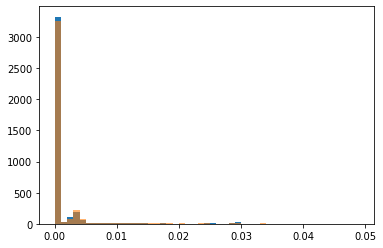

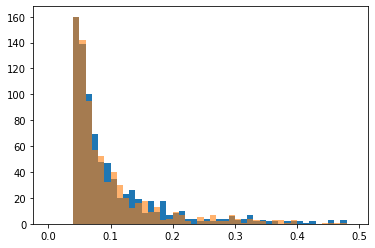

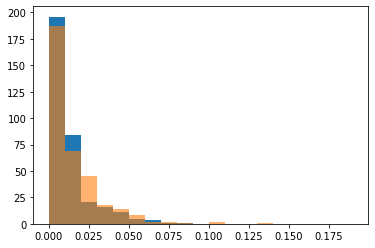

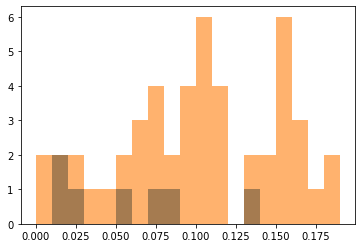

In [29]:
bins = np.arange(0,0.05,0.001)
plt.hist(y_part_phot,bins=bins)
plt.hist(n_part_phot,bins=bins,alpha=0.6)
plt.show()

bins = np.arange(0,0.5,0.01)
plt.hist(y_part_eIoni,bins=bins)
plt.hist(n_part_eIoni,bins=bins,alpha=0.6)
plt.show()

bins = np.arange(0,0.2,0.01)
plt.hist(y_part_eBrem,bins=bins)
plt.hist(n_part_eBrem,bins=bins,alpha=0.6)
plt.show()

bins = np.arange(0,0.2,0.01)
plt.hist(y_part_none,bins=bins)
plt.hist(n_part_none,bins=bins,alpha=0.6)
plt.show()

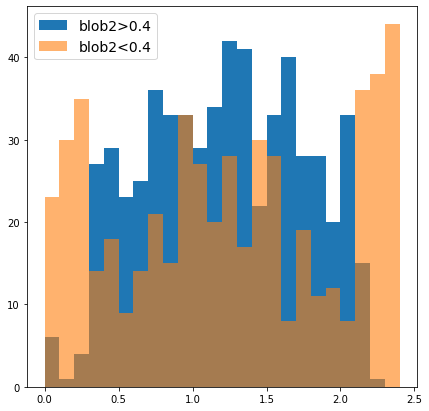

In [30]:
bins = np.arange(0,2.5,0.1)
plt.figure(figsize=(7,7))
plt.hist(y_part_none,bins=bins,label='blob2>0.4')
plt.hist(n_part_none,bins=bins,alpha=0.6,label='blob2<0.4')
plt.legend(fontsize=14)
plt.show()

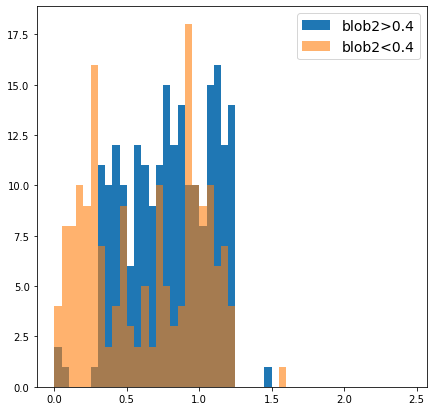

In [31]:
ys = []
ns = []
for x in range(len(y_part_nonesmall)):
    ys.append(min(y_part_nonesmall[x]))
for x in range(len(n_part_nonesmall)):
    ns.append(min(n_part_nonesmall[x]))
    
    

bins = np.arange(0,2.5,0.05)
plt.figure(figsize=(7,7))
plt.hist(ys,bins=bins,label='blob2>0.4')
plt.hist(ns,bins=bins,alpha=0.6,label='blob2<0.4')
plt.legend(fontsize=14)
plt.show()

In [32]:
y_part_nonesmall[1]

array([0.49468443, 1.9631457 ], dtype=float32)

In [45]:
no_pass_id[0:290]

array([  23,   25,   33,   35,   58,   68,   72,   74,   75,   77,   78,
         80,   83,   97,  100,  103,  105,  112,  113,  116,  117,  120,
        133,  154,  155,  162,  163,  169,  177,  178,  181,  184,  186,
        188,  193,  209,  222,  228,  240,  243,  260,  264,  273,  274,
        276,  285,  295,  322,  323,  334,  336,  346,  352,  367,  382,
        393,  397,  401,  404,  406,  410,  428,  431,  436,  444,  448,
        465,  478,  497,  507,  518,  536,  539,  549,  558,  564,  574,
        579,  582,  585,  589,  600,  610,  619,  624,  627,  629,  638,
        639,  645,  655,  662,  665,  684,  699,  701,  712,  715,  733,
        743,  751,  765,  776,  777,  786,  790,  796,  802,  806,  808,
        809,  810,  812,  836,  850,  875,  879,  881,  910,  911,  914,
        929,  940,  950,  957,  965,  972,  977,  989,  992, 1004, 1010,
       1028, 1036, 1038, 1043, 1044, 1073, 1078, 1083, 1086, 1088, 1104,
       1108, 1117, 1121, 1139, 1155, 1163, 1165, 11

In [105]:
EVENT=58

MC_Xhit = []
MC_Yhit = []
MC_Zhit = []
MC_Ehit = []
MC_Ihit = []

for x in range(DatL[EVENT],DatL[EVENT+1]):

    MC_Xhit.append(data.hits[x]["hit_position"][0])
    MC_Yhit.append(data.hits[x]["hit_position"][1])
    MC_Zhit.append(data.hits[x]["hit_position"][2])
    MC_Ehit.append(data.hits[x]["hit_energy"])
    MC_Ihit.append(data.hits[x]["hit_time"])
MC_Xhit = np.array(MC_Xhit)
MC_Yhit = np.array(MC_Yhit)
MC_Zhit = np.array(MC_Zhit)
MC_Ehit = np.array(MC_Ehit)
MC_Ihit = np.array(MC_Ihit)

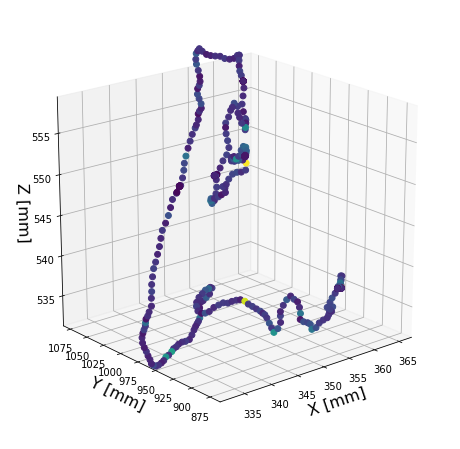

In [106]:
## Plot the MC truth
cmap = cm.viridis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(MC_Xhit, MC_Yhit, MC_Zhit, c=MC_Ehit, s=35, cmap=cmap)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)
#plt.colorbar(sc)
#ax.set_xlim(60,100)
#ax.set_ylim(1050,1100)
#ax.set_zlim(-1150,-1060)

mx = np.mean(MC_Xhit)
sx = np.std(MC_Xhit)
ax.set_xlim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Yhit)
sx = np.std(MC_Yhit)
ax.set_ylim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Zhit)
sx = np.std(MC_Zhit)
ax.set_zlim(mx-1*sx,mx+1*sx)
#ax.set_ylim(1050,1100)
#ax.set_zlim(-1150,-1060)


ax.view_init(20, 230)
#ax.view_init(30, 130)

plt.show()

In [107]:
RECO_INDEX = data.events.read()[EVENT][0]
x = (voxels_reco_df.X[RECO_INDEX]/3).round()
y = (voxels_reco_df.Y[RECO_INDEX]/3).round()
z = (voxels_reco_df.Z[RECO_INDEX]/3).round()
e = voxels_reco_df.E[RECO_INDEX]

x = x - min(x)
y = y - min(y)
z = z - min(z)


# find the voxl dim and create a 3d array of that dim
x_dim = int(max(x))
y_dim = int(max(y))
z_dim = int(max(z))

VOXELS = np.zeros((x_dim+1,y_dim+1,z_dim+1))

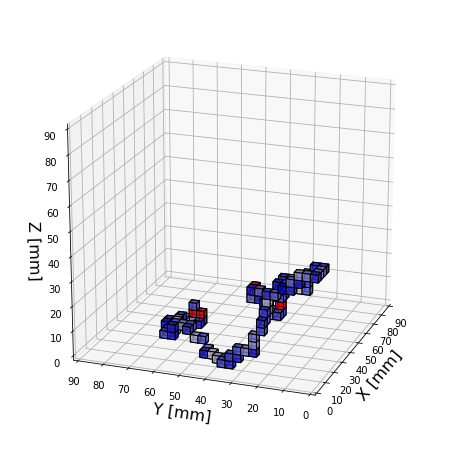

In [114]:
# sort through the event set the "turn on" the hit voxels 
cmap = cm.viridis
cmap = cm.Reds
cmap = cm.coolwarm
cmap = cm.bwr
norm = Normalize(vmin=0, vmax=max(e))
norm = Normalize(vmin=0, vmax=0.09)

colors = np.empty(VOXELS.shape, dtype=object)
for q in range(0,len(z)):
    VOXELS[int(x[q])][int(y[q])][int(z[q])] = 1
    colors[int(x[q])][int(y[q])][int(z[q])] = cmap(norm(e[q]))

# and plot everything
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
#a,b,c is spacing in mm needs an extra dim
a,b,c = np.indices((x_dim+2,y_dim+2,z_dim+2))*3
ax.voxels(a,b,c, VOXELS , facecolors=colors , edgecolor='k',alpha=0.7)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)

ax.set_xlim([0,90])
ax.set_ylim([0,90])
ax.set_zlim([0,90])

ax.view_init(30, 210)
#ax.view_init(10, 250)
ax.view_init(20, 200)

plt.show()

In [109]:
RECO_INDEX

2558

In [110]:
file_events.loc[ RECO_INDEX , : ]

num_MCparts            28
num_MChits            329
mcE               2.45783
smE               2.45551
smE_filter           True
num_voxels             92
voxel_sizeX       2.93091
voxel_sizeY       2.94207
voxel_sizeZ       2.99156
voxels_minZ       527.147
voxels_maxZ       566.037
voxels_maxRad     1077.68
veto_energy             0
fid_filter           True
num_tracks              1
track0_E          2.45551
track0_voxels          92
track0_length     132.442
track1_E              NaN
track1_voxels         NaN
track1_length         NaN
track2_E              NaN
track2_voxels         NaN
track2_length         NaN
tracks_filter        True
blob1_E          0.520162
blob2_E           0.26913
blobs_filter        False
roi_filter          False
Name: 2558, dtype: object

In [53]:
# import the FANAL volelized file
#reco_group_name = '/FANALIC/RECO_fwhm_07_voxel_10x10x10'
reco_group_name = '/FANALIC/RECO_fwhm_05_voxel_3x3x3'
file_events = pd.read_hdf("Inputs/bb0nu_RECO.h5", reco_group_name + '/events')
file_voxels = pd.read_hdf("Inputs/bb0nu_RECO.h5", reco_group_name + '/voxels')
events_reco_df = pd.DataFrame()
voxels_reco_df = pd.DataFrame()
events_reco_df = pd.concat([events_reco_df, file_events], axis=0)
voxels_reco_df = pd.concat([voxels_reco_df, file_voxels], axis=0)

In [54]:
file_events

,num_MCparts,num_MChits,mcE,smE,smE_filter,num_voxels,voxel_sizeX,voxel_sizeY,voxel_sizeZ,voxels_minZ,voxels_maxZ,voxels_maxRad,veto_energy,fid_filter
event_id,,,,,,,,,,,,,,
2500,8.0,299,2.45783,2.455245,True,57.0,2.796906,2.972229,2.854103,-713.500072,-670.688526,1295.959093,1.255070,False
2501,36.0,359,2.45783,2.458943,True,74.0,2.932582,2.716193,2.976478,-878.870465,-828.270343,976.220523,0.000000,True
2502,49.0,381,2.45783,2.454759,True,102.0,2.942666,2.893975,2.843216,-495.825279,-458.863472,1060.076634,0.000000,True
2503,30.0,338,2.45783,2.454886,True,91.0,2.906180,2.870572,2.870906,-929.315585,-897.735624,994.347669,0.000000,True
2504,50.0,344,2.45783,2.454887,True,73.0,2.917953,2.905392,2.967745,981.280076,1073.280166,1109.926119,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,14.0,306,2.45783,2.463650,True,80.0,2.886622,2.911016,2.703418,-162.374686,-138.043924,1141.032983,0.000000,True
4603,89.0,423,2.45783,2.455031,True,79.0,2.976454,2.938422,2.930195,476.892038,529.635549,1295.813266,0.946018,False
4604,30.0,334,2.45783,2.455491,True,81.0,2.868805,2.909814,2.843843,-157.613006,-132.018418,1151.610846,0.000000,True


In [192]:
# load the voxels, put in cm and round 
x = (voxels_reco_df.X[2895]/3).round()
y = (voxels_reco_df.Y[2895]/3).round()
z = (voxels_reco_df.Z[2895]/3).round()
e = voxels_reco_df.E[2895]

# off set them so they start at the origin
x = x - min(x)
y = y - min(y)
z = z - min(z)


In [193]:
min(e)

0.004595095291733742

In [194]:
# find the voxl dim and create a 3d array of that dim
x_dim = int(max(x))
y_dim = int(max(y))
z_dim = int(max(z))

VOXELS = np.zeros((x_dim+1,y_dim+1,z_dim+1))

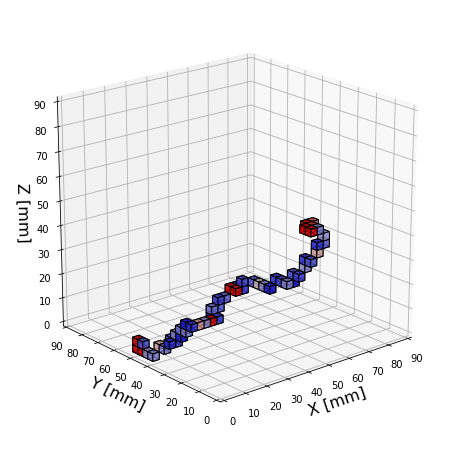

In [215]:
# sort through the event set the "turn on" the hit voxels 
cmap = cm.viridis
cmap = cm.Reds
cmap = cm.coolwarm
cmap = cm.bwr
norm = Normalize(vmin=0, vmax=max(e))
norm = Normalize(vmin=0, vmax=0.09)

colors = np.empty(VOXELS.shape, dtype=object)
for q in range(0,len(z)):
    VOXELS[int(x[q])][int(y[q])][int(z[q])] = 1
    colors[int(x[q])][int(y[q])][int(z[q])] = cmap(norm(e[q]))

# and plot everything
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
#a,b,c is spacing in mm needs an extra dim
a,b,c = np.indices((x_dim+2,y_dim+2,z_dim+2))*3
ax.voxels(a,b,c, VOXELS , facecolors=colors , edgecolor='k',alpha=0.7)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)

ax.set_xlim([0,90])
ax.set_ylim([0,90])
ax.set_zlim([0,90])

ax.view_init(30, 210)
#ax.view_init(10, 250)
ax.view_init(20, 230)

plt.show()

In [197]:
max(e)

0.32995283271884546

In [24]:
norm(max(e))

1.0

In [14]:
np.version.version

'1.16.1'

In [18]:
import matplotlib


In [19]:
matplotlib.__version__

'3.1.1'

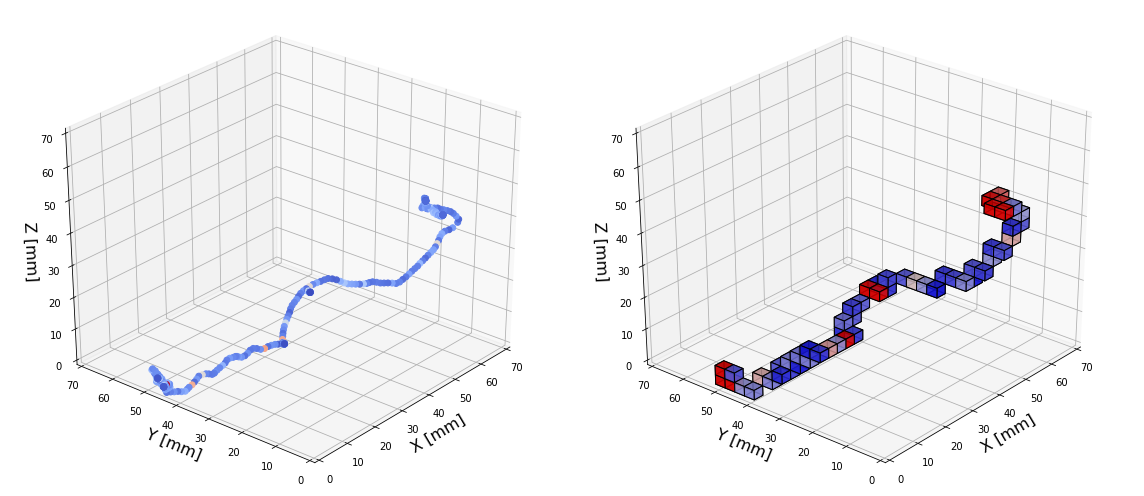

In [219]:
cmap = cm.coolwarm
fig = plt.figure(figsize=(16,7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(MC_Xhit_new, MC_Yhit_new, MC_Zhit_new, c=MC_Ehit, s=35, cmap=cmap)

ax1.set_xlabel('X [mm]',fontsize=16)
ax1.set_ylabel('Y [mm]',fontsize=16)
ax1.set_zlabel('Z [mm]',fontsize=16)
ax1.set_xlim([0,70])
ax1.set_ylim([0,70])
ax1.set_zlim([0,70])
ax1.view_init(30, 220)

ax2 = fig.add_subplot(122, projection='3d')
ax2.voxels(a,b,c, VOXELS , facecolors=colors , edgecolor='k',alpha=0.8)

ax2.set_xlabel('X [mm]',fontsize=16)
ax2.set_ylabel('Y [mm]',fontsize=16)
ax2.set_zlabel('Z [mm]',fontsize=16)
ax2.set_xlim([0,70])
ax2.set_ylim([0,70])
ax2.set_zlim([0,70])
ax2.view_init(30, 220)

plt.tight_layout()
#plt.savefig("bb0nu_3d_vox.png",bbox_inches='tight',dpi=400)
#plt.savefig("bb0nu_3d_vox.pdf")
plt.show()